In [1]:
# importing packages
import numpy as np
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [149]:
#create dataframe
df = pd.read_csv('honda_car_selling.csv')

In [150]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [114]:
####data processing ##############################

In [115]:
# Splitting off units of measurement 
df[['Miles', 'kms', 'space']] = df["kms Driven"].str.split(' ', expand = True)
df[['space', 'Price (USD)', '$']] = df["Price"].str.split(' ', expand = True)

In [116]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,Miles,kms,space,Price (USD),$
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT,19006,kms,,9.29,Lakh
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT,11936,kms,,13.95,Lakh
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX,29635,kms,,9.95,Lakh
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT,16163,kms,,13.26,Lakh
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V,105114,kms,,5.68,Lakh


In [117]:
# Dropping units of measurement 
df.drop(['kms', 'kms Driven','space'], axis = 1, inplace = True)
df.drop(['Price', '$'], axis = 1, inplace = True)

In [118]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,Petrol,Automatic,Honda City V CVT,19006,9.29
1,2021,Petrol,Automatic,Honda City ZX CVT,11936,13.95
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,29635,9.95
3,2020,Petrol,Automatic,Honda City ZX CVT,16163,13.26
4,2015,Petrol,Manual,Honda City i VTEC V,105114,5.68


In [119]:
# changing lakh int to USD float 
df['Price (USD)'] = df['Price (USD)'].astype(float)
df = df[df['Price (USD)'] <= 500000]
df['Price (USD)'] = round(df['Price (USD)'] * 1216.52)
df['Price (USD)'] = df['Price (USD)'].astype(int)

In [120]:
df.shape

(992, 6)

In [121]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,Petrol,Automatic,Honda City V CVT,19006,11301
1,2021,Petrol,Automatic,Honda City ZX CVT,11936,16970
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,29635,12104
3,2020,Petrol,Automatic,Honda City ZX CVT,16163,16131
4,2015,Petrol,Manual,Honda City i VTEC V,105114,6910


In [122]:
#changing kms into miles 
df['Miles'] = df['Miles'].astype(int)
df['Miles'] = round(df['Miles'] / 1.609)
df['Miles'] = df['Miles'].astype(int)

In [123]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,Petrol,Automatic,Honda City V CVT,11812,11301
1,2021,Petrol,Automatic,Honda City ZX CVT,7418,16970
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,18418,12104
3,2020,Petrol,Automatic,Honda City ZX CVT,10045,16131
4,2015,Petrol,Manual,Honda City i VTEC V,65329,6910


In [124]:
print(len(df['Fuel Type']))

992


In [125]:
# Strip extra spaces 
df['Fuel Type'] = df['Fuel Type'].str.strip()
# Drop missing values
df.dropna(inplace=True)

In [126]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,Petrol,Automatic,Honda City V CVT,11812,11301
1,2021,Petrol,Automatic,Honda City ZX CVT,7418,16970
2,2018,Petrol,Automatic,Honda City i-VTEC CVT ZX,18418,12104
3,2020,Petrol,Automatic,Honda City ZX CVT,10045,16131
4,2015,Petrol,Manual,Honda City i VTEC V,65329,6910


In [127]:
#convert fuel type column to true/false
# true = petrol 
# false = diesel 
for idx in df.index:
    if df.loc[idx, 'Fuel Type'] == 'Petrol':
        df.loc[idx, 'Fuel Type'] = True
    elif df.loc[idx, 'Fuel Type'] == 'Diesel':
        df.loc[idx, 'Fuel Type'] = False
        
#Convert Fuel Type T/F to boolean
df['Fuel Type'] = df['Fuel Type'].astype(bool)

In [128]:
df.head()


,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,True,Automatic,Honda City V CVT,11812,11301
1,2021,True,Automatic,Honda City ZX CVT,7418,16970
2,2018,True,Automatic,Honda City i-VTEC CVT ZX,18418,12104
3,2020,True,Automatic,Honda City ZX CVT,10045,16131
4,2015,True,Manual,Honda City i VTEC V,65329,6910


In [129]:
df.head()


,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,True,Automatic,Honda City V CVT,11812,11301
1,2021,True,Automatic,Honda City ZX CVT,7418,16970
2,2018,True,Automatic,Honda City i-VTEC CVT ZX,18418,12104
3,2020,True,Automatic,Honda City ZX CVT,10045,16131
4,2015,True,Manual,Honda City i VTEC V,65329,6910


In [130]:
# Strip extra spaces 
df['Suspension'] = df['Suspension'].str.strip()
print(df['Suspension'].unique())

['Automatic' 'Manual']


In [131]:
#convert Suspension column to true/false
# true = Automatic 
# false = Manual 
#for idx in df.index:
if df.loc[idx, 'Suspension'] == 'Automatic':
        df.loc[idx, 'Suspension'] = True
elif df.loc[idx, 'Suspension'] == 'Manual':
        df.loc[idx, 'Suspension'] = False
#Convert Suspension T/F to boolean
df['Suspension'] = df['Suspension'].astype(bool)

In [132]:
df.head()

,Year,Fuel Type,Suspension,Car Model,Miles,Price (USD)
0,2019,True,True,Honda City V CVT,11812,11301
1,2021,True,True,Honda City ZX CVT,7418,16970
2,2018,True,True,Honda City i-VTEC CVT ZX,18418,12104
3,2020,True,True,Honda City ZX CVT,10045,16131
4,2015,True,True,Honda City i VTEC V,65329,6910


In [133]:
print(df.dtypes)

Year            int64
Fuel Type        bool
Suspension       bool
Car Model      object
Miles           int32
Price (USD)     int32
dtype: object


In [134]:
print(df)

     Year  Fuel Type  Suspension                 Car Model  Miles  Price (USD)
0    2019       True        True          Honda City V CVT  11812        11301
1    2021       True        True         Honda City ZX CVT   7418        16970
2    2018       True        True  Honda City i-VTEC CVT ZX  18418        12104
3    2020       True        True         Honda City ZX CVT  10045        16131
4    2015       True        True       Honda City i VTEC V  65329         6910
..    ...        ...         ...                       ...    ...          ...
994  2007       True        True      Honda Civic 1.8 V MT  55935         1484
995  2016       True        True      Honda Amaze S i-VTEC  19577         5170
996  2017       True        True      Honda Amaze S Petrol  24695         6204
997  2017       True        True       Honda City i VTEC S  22374         7421
998  2015      False       False     Honda Amaze S i-Dtech  21965         3650

[992 rows x 6 columns]


In [135]:
#########Creating Visualizations#########

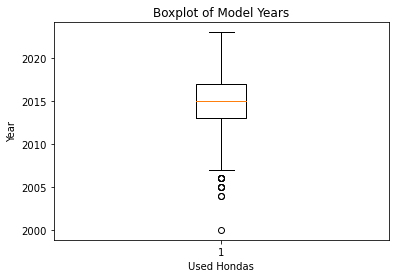

In [136]:
# boxplot - Model Years 
plt.boxplot(df['Year'])

# Set labels
plt.xlabel('Used Hondas')
plt.ylabel('Year')
plt.title('Boxplot of Model Years')

plt.show()

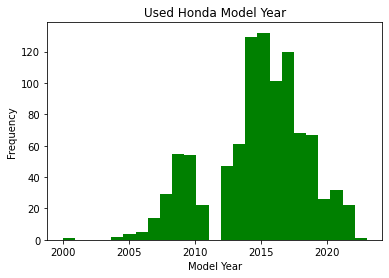

In [137]:
# Use log to correct the skewness of the Price data 
df['Year_log'] = np.log(df['Year'])
df['Year_exp'] = np.exp(df['Year_log'])

# Create a new histogram with the symmetrical data 
plt.hist(df['Year_exp'], bins=25, color='green')

# Set labels
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Used Honda Model Year')

plt.show()

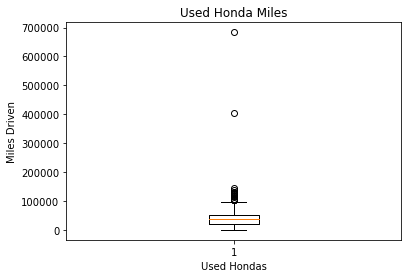

In [138]:
# Boxplot - Miles
plt.boxplot(df['Miles'])

# Set labels
plt.xlabel('Used Hondas')
plt.ylabel('Miles Driven')
plt.title('Used Honda Miles')

plt.show()

In [139]:
#Calculate z score of Miles to remove outliers from the data frame 
df['Miles_zscore'] = (df['Miles'] - df['Miles'].mean()) / df['Miles'].std()
outliers = df[(df['Miles_zscore'] > 3) | (df['Miles_zscore'] < -3)]

# remove outliers from the dataframe
df = df.drop(outliers.index)

print(df)

     Year  Fuel Type  Suspension                 Car Model  Miles  \
0    2019       True        True          Honda City V CVT  11812   
1    2021       True        True         Honda City ZX CVT   7418   
2    2018       True        True  Honda City i-VTEC CVT ZX  18418   
3    2020       True        True         Honda City ZX CVT  10045   
4    2015       True        True       Honda City i VTEC V  65329   
..    ...        ...         ...                       ...    ...   
994  2007       True        True      Honda Civic 1.8 V MT  55935   
995  2016       True        True      Honda Amaze S i-VTEC  19577   
996  2017       True        True      Honda Amaze S Petrol  24695   
997  2017       True        True       Honda City i VTEC S  22374   
998  2015      False       False     Honda Amaze S i-Dtech  21965   

     Price (USD)  Year_log  Year_exp  Miles_zscore  
0          11301  7.610358    2019.0     -0.881971  
1          16970  7.611348    2021.0     -1.015648  
2          1

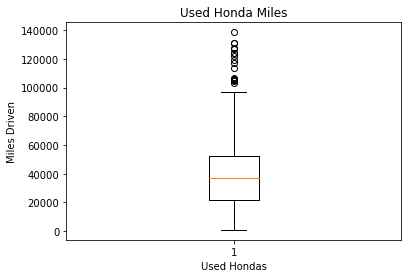

In [140]:
# create a new Boxplot - Miles without the outliers 
plt.boxplot(df['Miles'])

# Set labels
plt.xlabel('Used Hondas')
plt.ylabel('Miles Driven')
plt.title('Used Honda Miles')

# Show plot
plt.show()

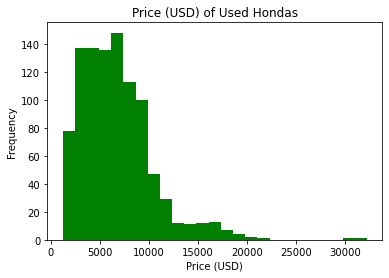

In [141]:
data = df['Price (USD)']
plt.hist(data, bins=25, color='green')

# Set labels
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Price (USD) of Used Hondas')

plt.show()


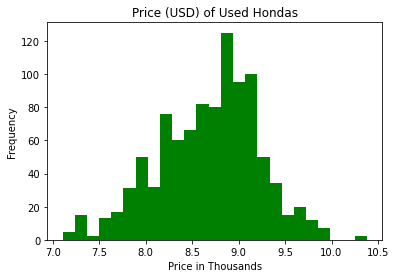

In [142]:
#Use log to correct the skewness of the Price data 
df['Prices(USD)_log'] = np.log(df['Price (USD)'])

#Create a new histogram with the symmetrical data 
plt.hist(df['Prices(USD)_log'], bins=25, color='green')

# Set labels
plt.xlabel('Price in Thousands')
plt.ylabel('Frequency')
plt.title('Price (USD) of Used Hondas')

plt.show()

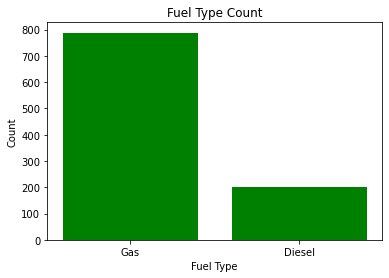

In [143]:
# Get count of Fuel type values
fuel_counts = df['Fuel Type'].value_counts()

# Create a bar plot to show the counts
plt.bar(x=['Gas', 'Diesel'], height=fuel_counts.values, color='green')

# Set labels
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Count')

plt.show()


In [144]:
#######Creating models ####################################################################

In [145]:
#Create training data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Miles'], df['Price (USD)'], test_size=0.2, random_state=42)

RMSE: 3011.75025531752
R2: 0.19122152069947873
MAE: 2259.9058630766713


Text(0.5, 1.0, 'Linear Regression')

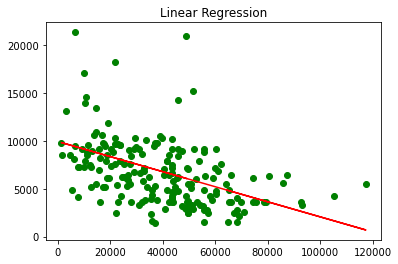

In [146]:
# Fit the model
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)

# Make predictions on test data
y_pred = model.predict(X_test.values.reshape(-1,1))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

#Calculate R2
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
print('R2:', r2)

#Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


# Plot the results
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')




